In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [170]:
df_1 = pd.read_csv("/content/winequality-red.csv", sep=';')
df_2 = pd.read_csv("/content/winequality-white.csv", sep=';')

In [171]:
df_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [172]:
df_1["type"] = 0
df_2["type"] = 1

In [173]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [174]:
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [175]:
df = df.drop("quality", axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [176]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [177]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [178]:
df['type'].value_counts()

,count
type,
1,4898
0,1599


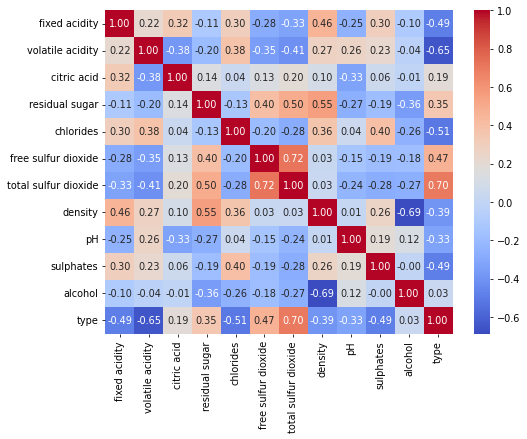

In [179]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

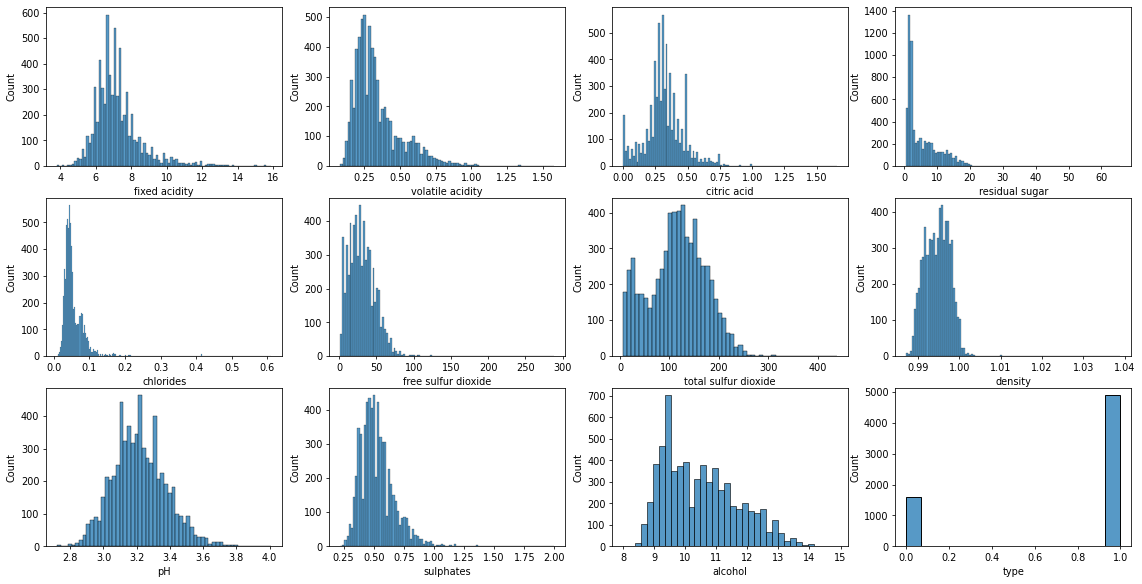

In [180]:
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
columns = df.columns
c = 0
for i in range(3):
  for j in range(4):
    sns.histplot(df[columns[c]], ax=axs[i, j])
    c = c + 1
plt.show()

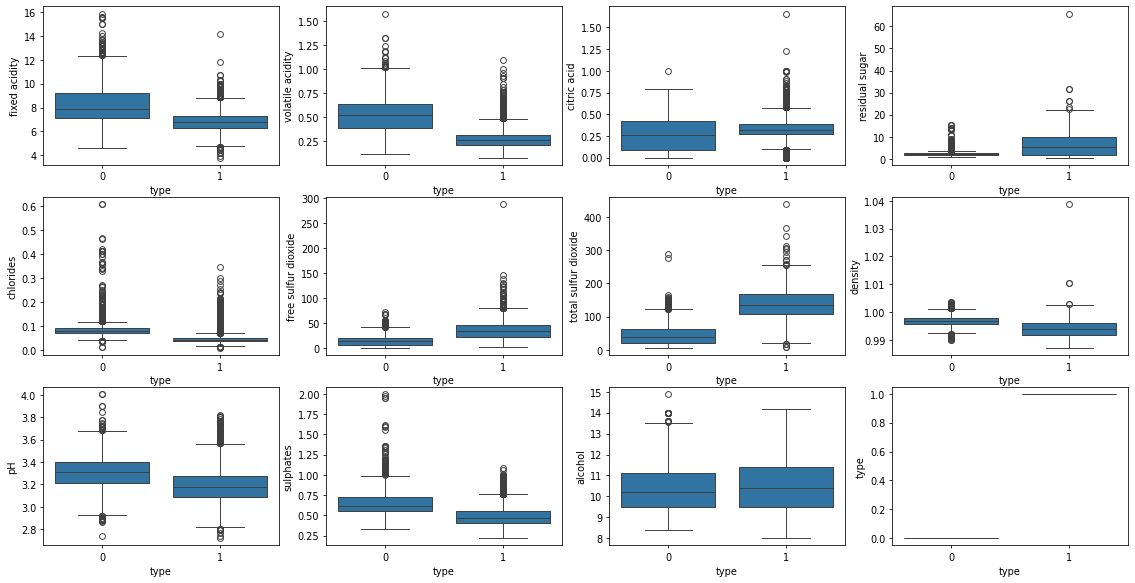

In [181]:
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
columns = df.columns
c = 0
for i in range(3):
  for j in range(4):
    sns.boxplot(x='type', y=columns[c], data=df, ax=axs[i, j])
    c = c + 1
plt.show()

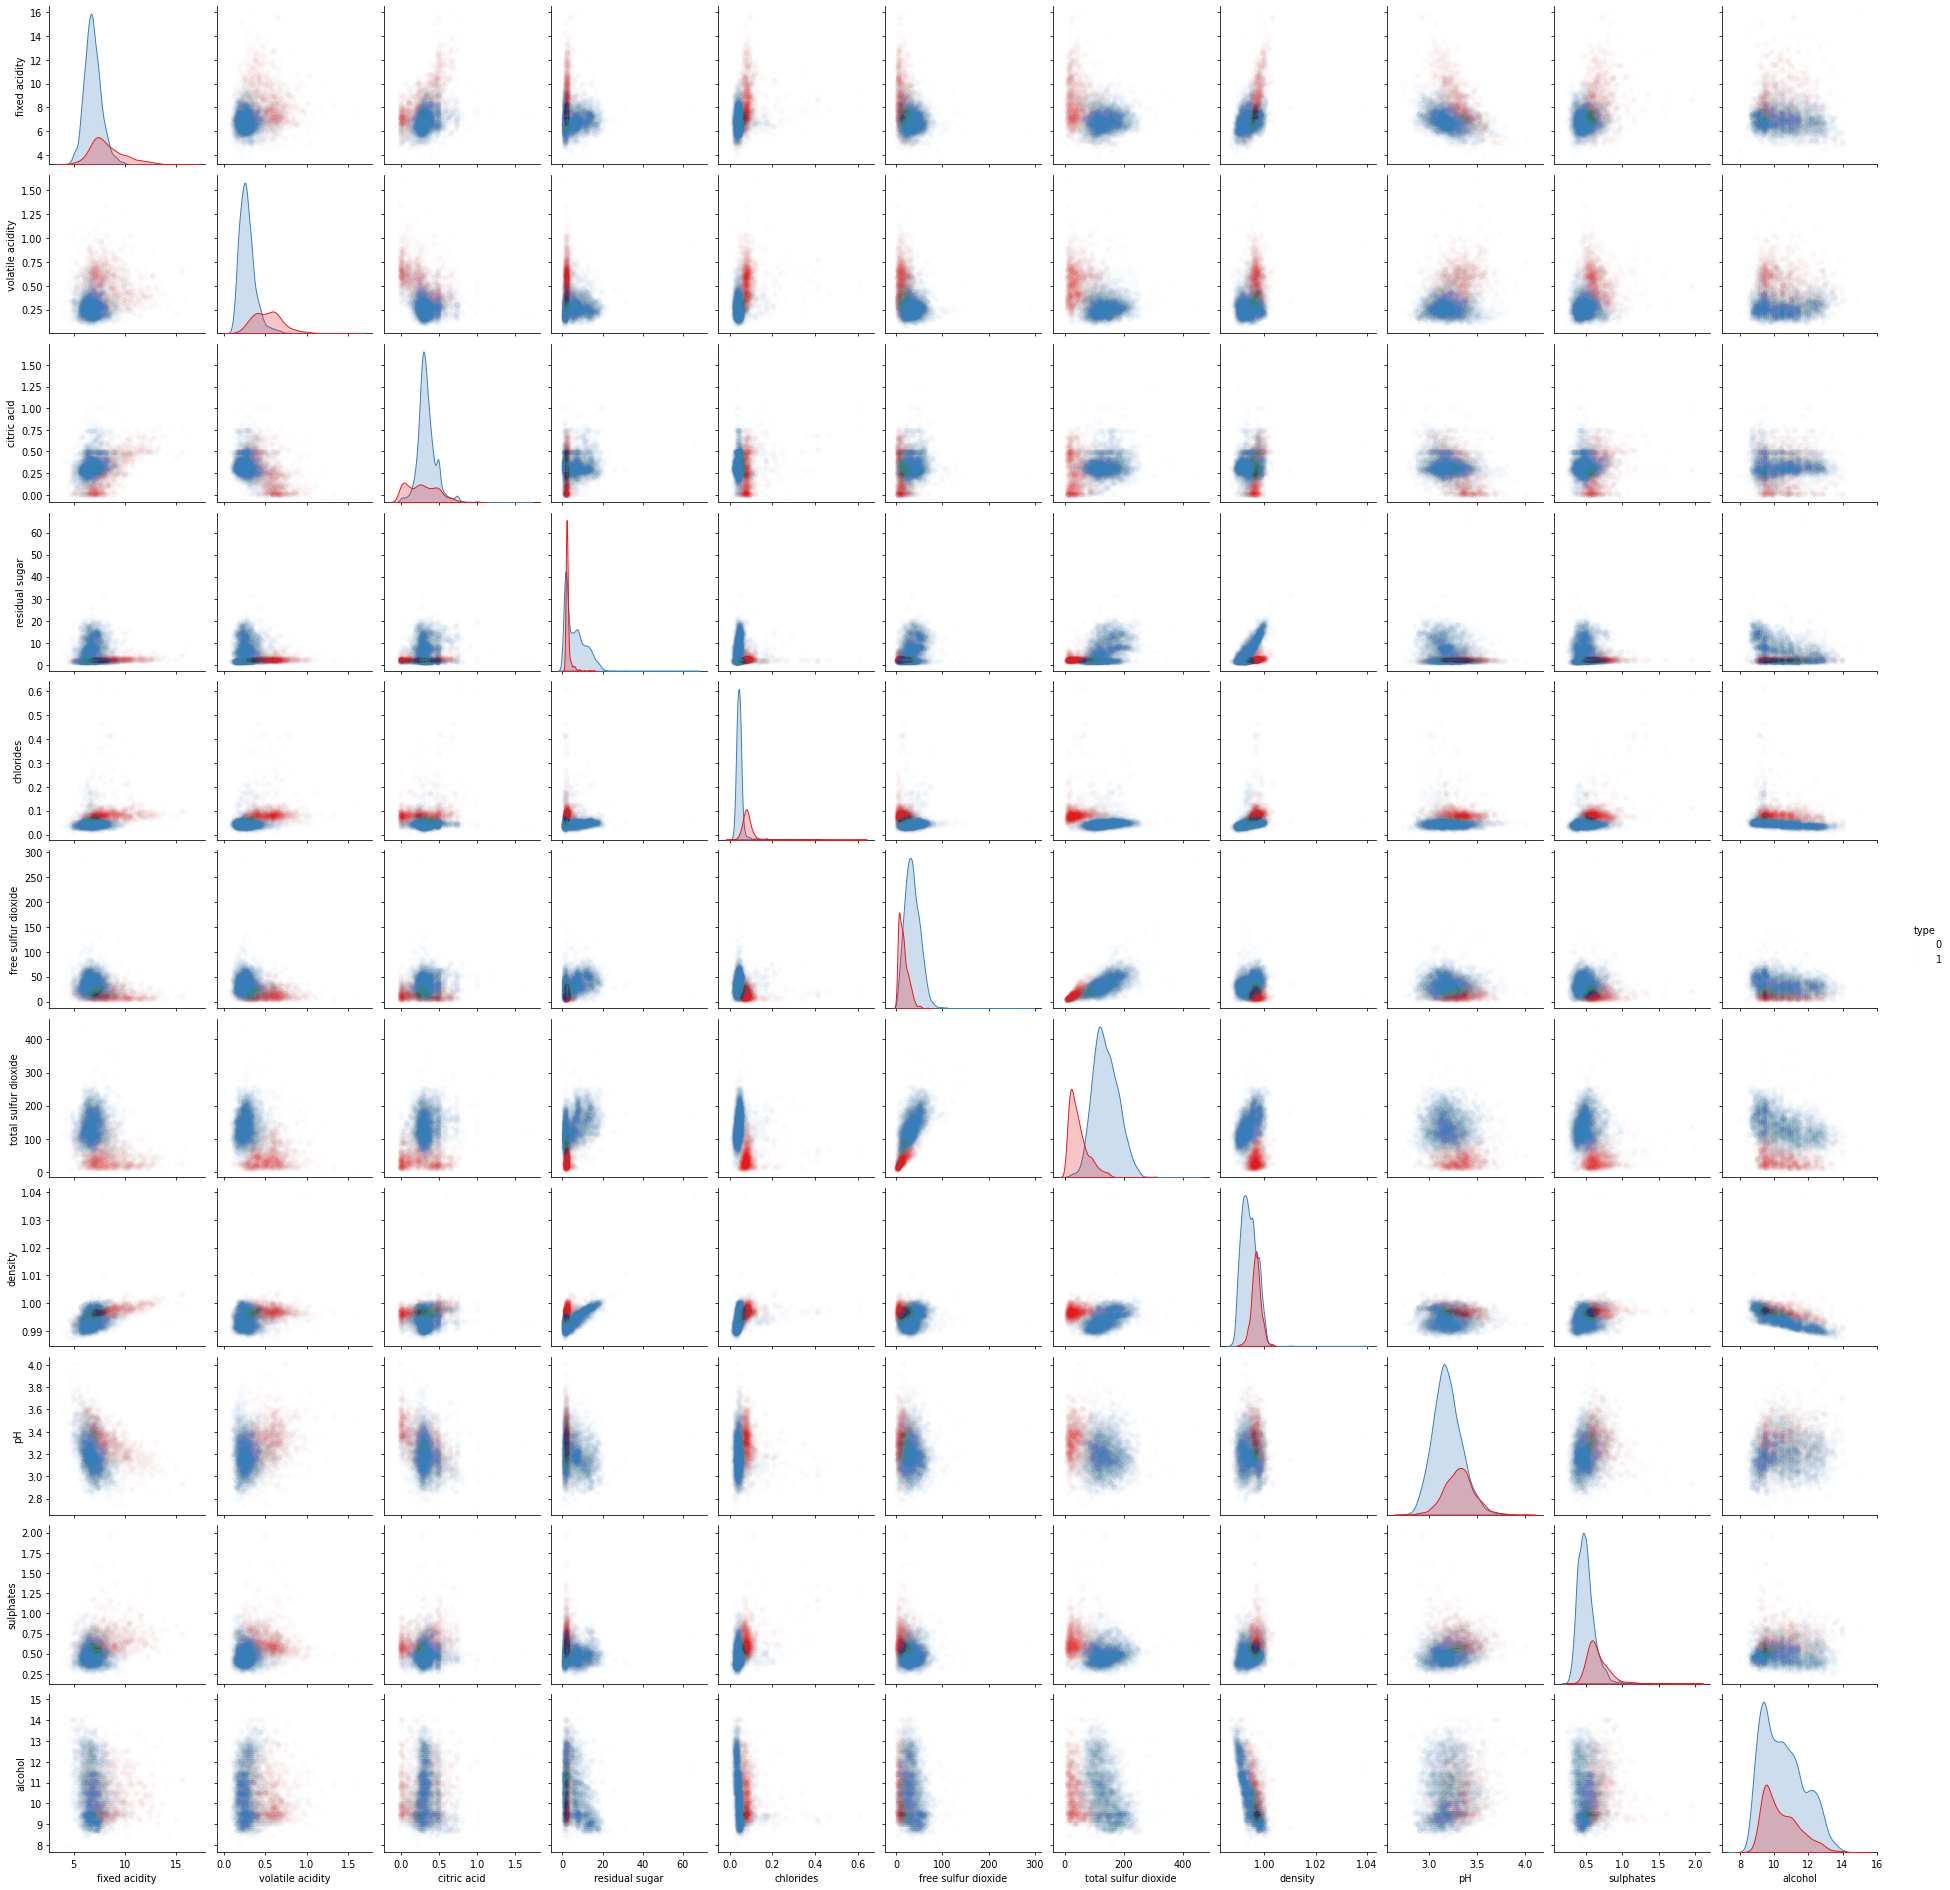

In [182]:
plt.rcParams['figure.dpi'] = 70
sns.pairplot(df, hue="type", palette = 'Set1',  plot_kws={'alpha': 0.01})
plt.show()

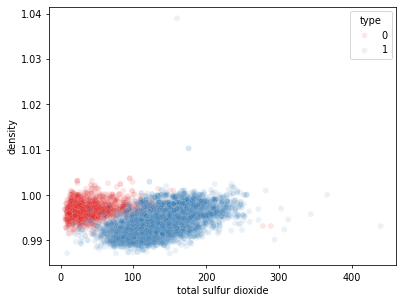

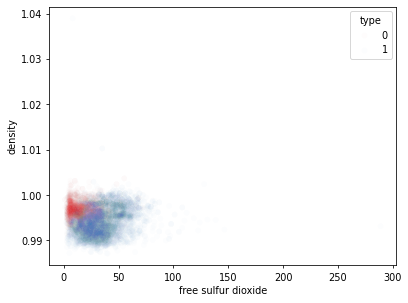

In [183]:
sns.scatterplot(x='total sulfur dioxide', y='density', hue='type', palette = 'Set1', alpha = 0.1, data=df)
plt.show()
sns.scatterplot(x='free sulfur dioxide', y='density', hue='type', palette = 'Set1', alpha = 0.01, data=df)
plt.show()

In [184]:
scaler = StandardScaler()
df_stand = scaler.fit_transform(df)
df_stand

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -1.75018984],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -1.75018984],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -1.75018984],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.57136659],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  0.57136659],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.57136659]])

In [185]:
X = df.drop('type', axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [186]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [187]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# **kNN**

In [188]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

In [189]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[309   2]
 [  5 984]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       311
           1       1.00      0.99      1.00       989

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [190]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

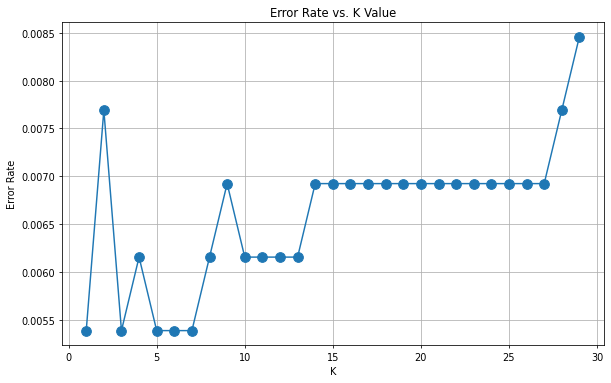

In [191]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [192]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

In [193]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[307   4]
 [  3 986]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       1.00      1.00      1.00       989

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



# **Decision Tree**

In [194]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=2,
    random_state=0
)

In [195]:
dt.fit(scaled_X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=0)

In [196]:
y_pred = dt.predict(scaled_X_test)

In [197]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[297  14]
 [ 20 969]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       311
           1       0.99      0.98      0.98       989

    accuracy                           0.97      1300
   macro avg       0.96      0.97      0.96      1300
weighted avg       0.97      0.97      0.97      1300



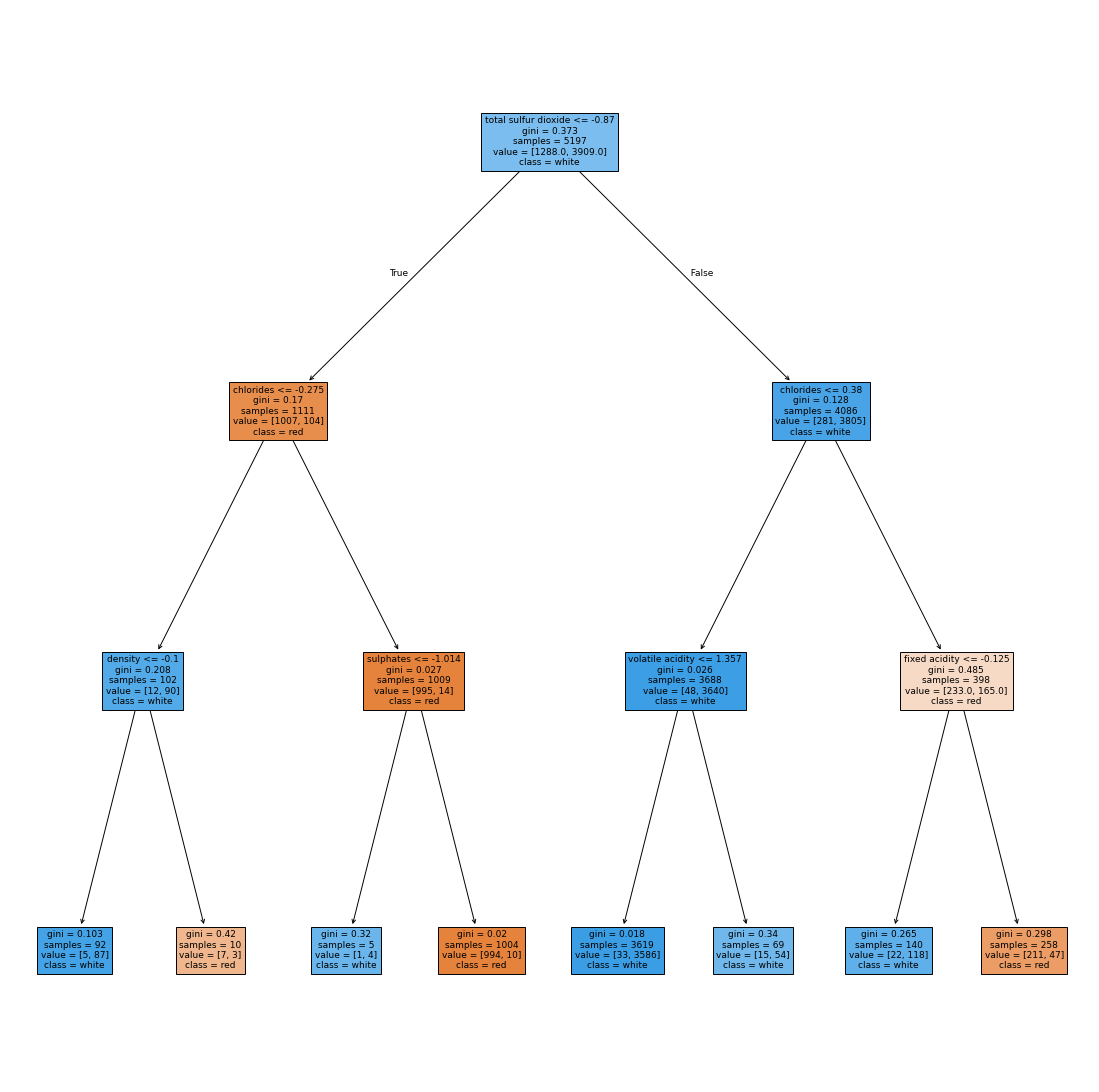

In [198]:
plt.figure(figsize = (20, 20))
plot_tree(dt, feature_names = columns,
          class_names = ['red', 'white'], filled = True)
plt.show()

# **SVM**

In [199]:
svm = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')

In [200]:
svm.fit(scaled_X_train,y_train)
y_pred = svm.predict(scaled_X_test)

In [201]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[272  39]
 [  3 986]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       311
           1       0.96      1.00      0.98       989

    accuracy                           0.97      1300
   macro avg       0.98      0.94      0.95      1300
weighted avg       0.97      0.97      0.97      1300



In [202]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [203]:
grid = GridSearchCV(SVC(), param_grid, cv=5,refit=True)

In [204]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [205]:
grid_predictions = grid.predict(scaled_X_test)

In [206]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[309   2]
 [  3 986]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       1.00      1.00      1.00       989

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300



# **Random Forest**

In [207]:
rf = RandomForestClassifier(random_state=0)
rf.fit(scaled_X_train, y_train)
y_pred = rf.predict(scaled_X_test)

In [208]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[309   2]
 [  4 985]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       1.00      1.00      1.00       989

    accuracy                           1.00      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



# **AdaBoost**

In [209]:
ada = AdaBoostClassifier()
ada.fit(scaled_X_train, y_train)
y_pred = ada.predict(scaled_X_test)

In [210]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[310   1]
 [  8 981]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       311
           1       1.00      0.99      1.00       989

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



# **Winequality White**

In [211]:
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [212]:
df_2 = df_2.drop("type", axis=1)

In [213]:
df_2['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [214]:
df_2_cleaned = df_2[(df_2['quality'] != 3) & (df_2['quality'] != 9)]
df_2_cleaned['quality'].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163


In [215]:
X = df_2_cleaned.drop('quality', axis=1)
y = df_2_cleaned['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [216]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# **kNN**

In [217]:
knn_params = {'n_neighbors': range(1, 15)}
knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, refit=True)
knn.fit(scaled_X_train, y_train)
print("Best KNN:", knn.best_params_, "Score:", knn.score(scaled_X_test, y_test))
pred = knn.predict(scaled_X_test)

Best KNN: {'n_neighbors': 1} Score: 0.6369230769230769


In [218]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 14  19   8   1   0]
 [  9 181  81  13   1]
 [  7  78 303  50   9]
 [  0   7  44 107   7]
 [  0   6   8   6  16]]
              precision    recall  f1-score   support

           4       0.47      0.33      0.39        42
           5       0.62      0.64      0.63       285
           6       0.68      0.68      0.68       447
           7       0.60      0.65      0.63       165
           8       0.48      0.44      0.46        36

    accuracy                           0.64       975
   macro avg       0.57      0.55      0.56       975
weighted avg       0.63      0.64      0.64       975



# **Decision Tree**

In [219]:
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt = GridSearchCV(DecisionTreeClassifier(random_state=0), dt_params, cv=5, refit=True)
dt.fit(scaled_X_train, y_train)
print("Best DT:", dt.best_params_, "Score:", dt.score(scaled_X_test, y_test))
pred = dt.predict(scaled_X_test)

Best DT: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2} Score: 0.5538461538461539


In [220]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  6  24  11   1   0]
 [ 12 155 105  12   1]
 [  3  98 298  43   5]
 [  1  10  77  76   1]
 [  0   1  23   7   5]]
              precision    recall  f1-score   support

           4       0.27      0.14      0.19        42
           5       0.54      0.54      0.54       285
           6       0.58      0.67      0.62       447
           7       0.55      0.46      0.50       165
           8       0.42      0.14      0.21        36

    accuracy                           0.55       975
   macro avg       0.47      0.39      0.41       975
weighted avg       0.54      0.55      0.54       975



# **SVM**

In [221]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svm = GridSearchCV(SVC(), param_grid, cv=5,refit=True)
svm.fit(scaled_X_train,y_train)
print("Best SVM:", svm.best_params_, "Score:", svm.score(scaled_X_test, y_test))
pred = svm.predict(scaled_X_test)

Best SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'} Score: 0.6676923076923077


In [222]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  7  10  24   1   0]
 [  3 165 111   6   0]
 [  2  56 364  24   1]
 [  0   6  56 100   3]
 [  0   2  15   4  15]]
              precision    recall  f1-score   support

           4       0.58      0.17      0.26        42
           5       0.69      0.58      0.63       285
           6       0.64      0.81      0.72       447
           7       0.74      0.61      0.67       165
           8       0.79      0.42      0.55        36

    accuracy                           0.67       975
   macro avg       0.69      0.52      0.56       975
weighted avg       0.67      0.67      0.66       975



# **Random Forest**

In [223]:
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
rf = GridSearchCV(RandomForestClassifier(random_state=0), rf_param_grid, cv=5, refit=True)
rf.fit(scaled_X_train, y_train)
print("Best RF:", rf.best_params_, "Score:", rf.score(scaled_X_test, y_test))
pred = rf.predict(scaled_X_test)

Best RF: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200} Score: 0.6451282051282051


In [224]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  2  26  13   1   0]
 [  3 181  97   4   0]
 [  0  71 357  19   0]
 [  0   3  77  85   0]
 [  0   0  27   5   4]]
              precision    recall  f1-score   support

           4       0.40      0.05      0.09        42
           5       0.64      0.64      0.64       285
           6       0.63      0.80      0.70       447
           7       0.75      0.52      0.61       165
           8       1.00      0.11      0.20        36

    accuracy                           0.65       975
   macro avg       0.68      0.42      0.45       975
weighted avg       0.66      0.65      0.62       975



# **AdaBoost**

In [225]:
ada_param_grid = {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5, 1.0]}
ada = GridSearchCV(AdaBoostClassifier(), ada_param_grid, cv=5, refit=True)
ada.fit(scaled_X_train, y_train)
print("Best AdaBoost:", ada.best_params_, "Score:", ada.score(scaled_X_test, y_test))
pred = ada.predict(scaled_X_test)

Best AdaBoost: {'learning_rate': 0.5, 'n_estimators': 200} Score: 0.5097435897435898


In [226]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  3  28  10   1   0]
 [  3 160 114   8   0]
 [  1  94 298  54   0]
 [  0   4 125  36   0]
 [  0   1  26   9   0]]
              precision    recall  f1-score   support

           4       0.43      0.07      0.12        42
           5       0.56      0.56      0.56       285
           6       0.52      0.67      0.58       447
           7       0.33      0.22      0.26       165
           8       0.00      0.00      0.00        36

    accuracy                           0.51       975
   macro avg       0.37      0.30      0.31       975
weighted avg       0.48      0.51      0.48       975



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
